In [1]:
import pandas as pd
import numpy as np
import cmdstanpy
from scripts.tools.simulation_tools import *
import matplotlib.pyplot as plt
%matplotlib inline

/Users/demetri/opt/miniconda3/envs/stan/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning:

Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.

/Users/demetri/opt/miniconda3/envs/stan/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning:

Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.

/Users/demetri/opt/miniconda3/envs/stan/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning:

Trying to unpickle estimator GridSearchCV from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.



# Fit the model

In [2]:
concentration_data = pd.read_csv("data/experiment.csv")

subject_data = concentration_data.drop_duplicates(['subjectids'])

model_data = dict(
    n_subjects = subject_data.shape[0],
    D = subject_data.D.tolist(),

    subjectids = concentration_data.subjectids.tolist(),
    times = concentration_data.time.tolist(),
    yobs = concentration_data.yobs.tolist(),
    N = concentration_data.shape[0]
)

model = cmdstanpy.CmdStanModel(stan_file='experiment_models/tdm_model.stan')

fit = model.sample(model_data, chains=12, parallel_chains=4)

df = fit.draws_pd()


# Load new model for simulations

In [3]:
new_model = cmdstanpy.CmdStanModel(exe_file='experiment_models/bayesian_tdm_single_subject')


In [19]:
pk_params = pd.read_csv('data/sampled_covars_and_pk.csv')

dose = 10
tpred, dose_times, dose_size, decision_point = setup_experiment(dose,num_days=10, doses_per_day=2, hours_per_dose=12)

In [20]:
tobs = [111.0]
yobs, ytrue = observe(tobs, theta, dose_times, dose_size, return_truth = True)

In [21]:
predict_tdm = fit_tdm(tobs, yobs, theta, dose_times, dose_size)

In [22]:
ic, dyn = predict_tdm(np.arange(0, 120, 0.5), dose_times, dose_size)

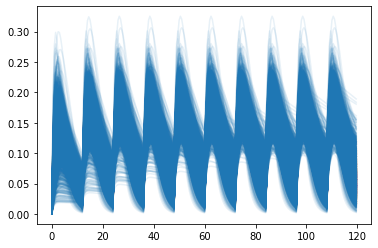

In [25]:
plt.plot(np.arange(0, 120, 0.5), (ic + dyn).T, alpha = 0.1, color = 'C0');